In [35]:
import fbma
import pandas as pd

In [72]:
fbma.msgs.head()

,members,sender,text,time
0,"['Kevin Wang', 'Walton Wu']",Kevin Wang,don't take calcium supplements,"Monday, June 13, 2011 at 9:20pm PDT"
1,"['Kevin Wang', 'Walton Wu']",Kevin Wang,my doctor was all,"Monday, June 13, 2011 at 9:20pm PDT"
2,"['Kevin Wang', 'Walton Wu']",Kevin Wang,i dunno,"Monday, June 13, 2011 at 9:20pm PDT"
3,"['Kevin Wang', 'Walton Wu']",Kevin Wang,asdf,"Monday, June 13, 2011 at 9:18pm PDT"
4,"['Kevin Wang', 'Walton Wu']",Walton Wu,lol,"Monday, June 13, 2011 at 9:18pm PDT"


In [3]:
%matplotlib inline

In [4]:
msgs = fbma.msgs

In [5]:
kevin = msgs[msgs['sender'] == "Kevin Wang"]

In [6]:
kevin.head()

,members,sender,text,time
0,"['Kevin Wang', 'Walton Wu']",Kevin Wang,don't take calcium supplements,"Monday, June 13, 2011 at 9:20pm PDT"
1,"['Kevin Wang', 'Walton Wu']",Kevin Wang,my doctor was all,"Monday, June 13, 2011 at 9:20pm PDT"
2,"['Kevin Wang', 'Walton Wu']",Kevin Wang,i dunno,"Monday, June 13, 2011 at 9:20pm PDT"
3,"['Kevin Wang', 'Walton Wu']",Kevin Wang,asdf,"Monday, June 13, 2011 at 9:18pm PDT"
7,"['Kevin Wang', 'Walton Wu']",Kevin Wang,lol,"Monday, June 13, 2011 at 9:18pm PDT"


In [7]:
others = msgs[msgs['sender'] != "Kevin Wang"]

In [75]:
others.head()

,members,sender,text,time
4,"['Kevin Wang', 'Walton Wu']",Walton Wu,lol,"Monday, June 13, 2011 at 9:18pm PDT"
5,"['Kevin Wang', 'Walton Wu']",Walton Wu,lt helps,"Monday, June 13, 2011 at 9:18pm PDT"
6,"['Kevin Wang', 'Walton Wu']",Walton Wu,want some calcium pills?,"Monday, June 13, 2011 at 9:18pm PDT"
9,"['Kevin Wang', 'Walton Wu']",Walton Wu,l'm pretty much recovered,"Monday, June 13, 2011 at 9:18pm PDT"
10,"['Kevin Wang', 'Walton Wu']",Walton Wu,l'm surprised you aren't recovered,"Monday, June 13, 2011 at 9:18pm PDT"


In [17]:
from collections import Counter
def make_words(df, case_sensitive = False):
    words = Counter()
    txt = df["text"]
    if case_sensitive == False:
        txt = txt.str.lower()
    #print(txt.str.split())
    txt.str.split().apply(words.update)
    return words

In [18]:
kevin = kevin[1:]

In [19]:
kwords = make_words(kevin)

In [76]:
#kwords

In [ ]:
types

In [ ]:
types != str

In [ ]:
types[types!=str]

In [ ]:
kevin[types!=str]

In [59]:
def laugh_words(words):
    for word, amount in sorted(words.items(), key=lambda x: x[1], reverse = True):
        if set(word) in ({"h", "a"}, {"l", "o"}):
            if word not in {'ah'}:
                yield (word, amount)

In [60]:
lwords = pd.DataFrame(list(laugh_words(kwords)))

In [61]:
lwords.head()

,0,1
0,lol,7628
1,haha,1004
2,hahaha,342
3,hahahaha,267
4,lololol,245


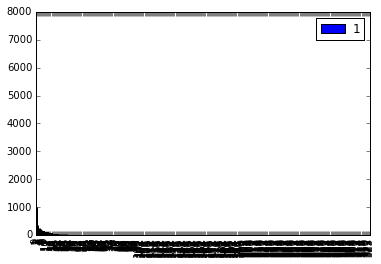

In [62]:
lwords.plot(kind="bar")

In [63]:
lwords

,0,1
0,lol,7628
1,haha,1004
2,hahaha,342
3,hahahaha,267
4,lololol,245
5,lolololol,206
6,hahahahah,168
7,hahahah,142
8,lollll,124
9,hahahahaha,121


In [64]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [65]:
print_full(lwords)

                                                     0     1
0                                                  lol  7628
1                                                 haha  1004
2                                               hahaha   342
3                                             hahahaha   267
4                                              lololol   245
5                                            lolololol   206
6                                            hahahahah   168
7                                              hahahah   142
8                                               lollll   124
9                                           hahahahaha   121
10                                         lololololol    93
11                                         hahahahahah    92
12                                             lolllll    76
13                                               lolll    66
14                                               lolol    60
15                      

In [66]:
type(kwords)

collections.Counter

In [67]:
sum(kwords.values())

594766

In [70]:
lwords[1].sum()

11838

In [71]:
lwords[1].sum()/sum(kwords.values())
#proportion of the words that I say that are laughter

0.019903625963824428

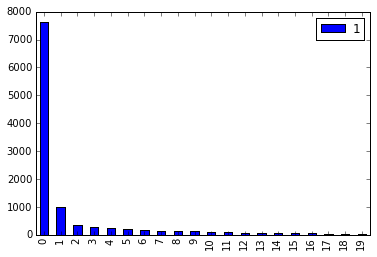

In [92]:
lwords.set_index(0)
lwords[:20].plot(kind="bar")

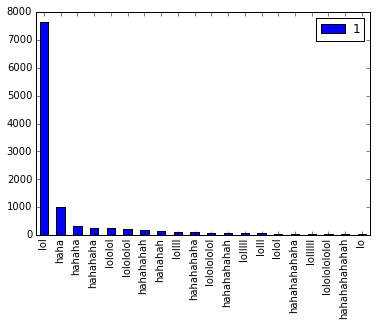

In [115]:
x = lwords[:20].plot(kind="bar")
x.set_xticklabels(lwords[0])

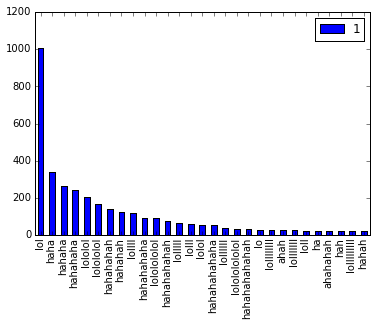

In [141]:
x = lwords[1:30].plot(kind="bar")
#x.set_xticks([i-1 for i in range(30)])


In [144]:
type(lwords[0]) ,type(lwords[0][1:30])
lwords[0][1:30][1]

'haha'